In [2]:
import ROOT
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from loadCfg import loadCfg
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import root_pandas as rp
pd.set_option('mode.chained_assignment',None)


plt.style.use('ggplot')
%matplotlib inline

Welcome to JupyROOT 6.08/06
{'_SET_mcprocessBranch': '"mcprocess"', '_SET_nRndRepSubset': 0, '_SET_alwaysSaveTheseEvents': '"229079"', '_SET_uniquenessTracking': '""', '_SET_kDim': 600, '_SET_emailWhenFinished': '"lng1492@gmail.com"', '_SET_fitLocationBase': '"var1Vsvar2Fit_toMain"', '_SET_saveBShistsAlso': 0, '_SET_standardizationType': '"range"', '_SET_runTag': '""', '_SET_verbose': 1, '_SET_nProcess': 26, '_SET_numberEventsToSavePerProcess': 10, '_SET_sbWeight': '"weightBS"', '_SET_nBS': 0, '_SET_runBatch': 0, '_SET_weightingScheme': '"as"', '_SET_nentries': -1, '_SET_saveBranchOfNeighbors': 1, '_SET_seedShift': 1341, '_SET_redistributeBkgSigFits': 0, '_SET_doKRandomNeighbors': 0, '_SET_varStringBase': '"cosTheta_eta_gj;phi_eta_gj;cosTheta_X_cm;nn0;nn1;Mpi0g1;Mpi0g2"', '_SET_saveMemUsage': 0, '_SET_accWeight': '"AccWeight"', '_SET_discrimVars': '"Mpi0;Meta"'}


In [2]:
configDict=loadCfg()
nentries=configDict["_SET_nentries"]
kDim=configDict["_SET_kDim"]

## Quickly checking Mpi0eta's a0/a2 speparation with and without accidental

In [5]:
# cols=["Mpi0g1","Mpi0eta","AccWeight","cosTheta_eta_gj","Mpi0","Meta","chiSq"]
# data=rp.read_root("/d/grid15/ln16/pi0eta/092419/selected2017_2018/degALL_data_2017_treeFlat_DSelector.root",
#                   "degALL_data_2017_tree_flat",
#                   columns=cols)
# fig,ax=plt.subplots(1,1,figsize=(16,8))
# binedges=np.histogram(data.Mpi0eta,bins=150)[1]
# data.Mpi0eta.hist(bins=binedges,alpha=0.7)
# data.Mpi0eta.hist(bins=binedges,weights=data.AccWeight,alpha=0.7)

## Look at the reconstructed vs input signal yields to determine biases

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(16,12))
axes=axes.flatten()

log=pd.read_csv("checkGausFeedThrough/logBias_NoBkgPeak.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
interesting_kDims=[100,500,1000]#log.kDim.unique()
cmap = mpl.cm.get_cmap('viridis')
colors=[cmap(val) for val in np.linspace(0,1,len(interesting_kDims))]
ylims=(-0.01,0.05)
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[0])
axes[0].legend(prop={"size":16})
axes[0].axhline(0,c='black',linestyle='--')
axes[0].set_ylabel("Percentage of Signal Gained",size=16)
axes[0].set_xlabel("Initial Signal Fraction",size=16)
axes[0].set_title("Bkg pi0 Peak Frac = 0",size=22)
axes[0].set_ylim(ylims)

log=pd.read_csv("checkGausFeedThrough/logBias_AllBkgPeak.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[1])
axes[1].legend(prop={"size":16})
axes[1].axhline(0,c='black',linestyle='--')
axes[1].set_ylabel("Percentage of Signal Gained",size=16)
axes[1].set_xlabel("Initial Signal Fraction",size=16)
axes[1].set_title("Bkg pi0 Peak Frac = 1",size=22)
axes[1].set_ylim(ylims)

log=pd.read_csv("checkGausFeedThrough/logBias_NoBkgPeak_Minos.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[2])
axes[2].legend(prop={"size":16})
axes[2].axhline(0,c='black',linestyle='--')
axes[2].set_ylabel("Percentage of Signal Gained",size=16)
axes[2].set_xlabel("Initial Signal Fraction",size=16)
axes[2].set_title("Bkg pi0 Peak Frac = 1",size=22)
axes[2].set_ylim(ylims)

log=pd.read_csv("checkGausFeedThrough/logBias_AllBkgPeak_Minos.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[3])
axes[3].legend(prop={"size":16})
axes[3].axhline(0,c='black',linestyle='--')
axes[3].set_ylabel("Percentage of Signal Gained",size=16)
axes[3].set_xlabel("Initial Signal Fraction",size=16)
axes[3].set_title("Bkg pi0 Peak Frac = 1",size=22)
axes[3].set_ylim(ylims)

plt.tight_layout()

## Any features in NLL and Q-Value?

In [7]:
# #dataFile=ROOT.TFile.Open("results_500k_pi0Bkg_14/diagnosticPlots/postQVal_flatTree.root")
# dataFile=ROOT.TFile.Open("logs/postQVal_flatTree.root")
# dataTree=dataFile.degALL_acc_mEllipse_tree_flat

# if nentries==-1:
#     nentries=dataTree.GetEntries()

# qvalues=np.zeros(nentries)
# NLLBests=np.zeros(nentries)
# NLLWorsts=np.zeros(nentries)
# worst_qvalues=np.zeros(nentries)
# eff_nentrieses=np.zeros(nentries)
# Mpi0g1s=np.zeros(nentries)
# Mpi0etas=np.zeros(nentries)
# Mpi0s=np.zeros(nentries)
# Metas=np.zeros(nentries)
# AccWeights=np.zeros(nentries)
# mcprocesses=np.zeros(nentries)
# weightBSs=np.zeros(nentries)
# cosTheta_eta_gjs=np.zeros(nentries)
# chiSqs=np.zeros(nentries)
# nn0s=np.zeros(nentries)
# nn1s=np.zeros(nentries)
# for ientry in range(nentries):
#     if ientry%1000==0:
#         print("loading event: "+str(ientry))
#     dataTree.GetEntry(ientry)
#     qvalues[ientry]=dataTree.qvalue
#     NLLBests[ientry]=dataTree.qvalue_NLLBest
#     NLLWorsts[ientry]=dataTree.qvalue_NLLWorst
#     worst_qvalues[ientry]=dataTree.worst_qvalue
#     eff_nentrieses[ientry]=dataTree.eff_nentries
#     Mpi0g1s[ientry]=dataTree.Mpi0g1
#     Mpi0s[ientry]=dataTree.Mpi0
#     Metas[ientry]=dataTree.Meta
#     Mpi0etas[ientry]=dataTree.Mpi0eta
#     AccWeights[ientry]=dataTree.AccWeight
#     mcprocesses[ientry]=dataTree.mcprocess
#     weightBSs[ientry]=dataTree.weightBS
#     cosTheta_eta_gjs[ientry]=dataTree.cosTheta_eta_gj
#     chiSqs[ientry]=dataTree.chiSq
#     nn0s[ientry]=dataTree.nn0
#     nn1s[ientry]=dataTree.nn1
# data=pd.DataFrame([qvalues,NLLBests,NLLWorsts,worst_qvalues,eff_nentrieses,Mpi0g1s,Mpi0etas,
#                   AccWeights,mcprocesses,weightBSs,cosTheta_eta_gjs,Mpi0s,Metas,
#                   chiSqs,nn0s,nn1s]).T
# data.columns=["qvalues","NLLBests","NLLWorsts","worst_qvalues","eff_nentrieses","Mpi0g1s","Mpi0etas",
#              "AccWeight","mcprocess","weightBS","cosTheta_eta_gj","Mpi0","Meta","chiSq","nn0","nn1"]

In [3]:
cols=["qvalue","NLLBest","NLLWorst","worst_qvalue","eff_nentries","Mpi0g1","Mpi0eta",
             "AccWeight","mcprocess","weightBS","cosTheta_eta_gj","Mpi0","Meta","chiSq","nn0","nn1"]
pis=["px","py","pz","e"]
for gi in range(1,5):
    for pi in pis:
        cols=cols+["g"+str(gi)+"_p4_kin_"+pi]
data=rp.read_root("logs/postQVal_flatTree.root","degALL_acc_mEllipse_tree_flat",columns=cols)

Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [50]:
def calculateMass(df,i,j):
    de=df["g"+str(i)+"_p4_kin_e"]+df["g"+str(j)+"_p4_kin_e"]
    dpx=df["g"+str(i)+"_p4_kin_px"]+df["g"+str(j)+"_p4_kin_px"]
    dpy=df["g"+str(i)+"_p4_kin_py"]+df["g"+str(j)+"_p4_kin_py"]
    dpz=df["g"+str(i)+"_p4_kin_pz"]+df["g"+str(j)+"_p4_kin_pz"]
    return np.sqrt(de**2-(dpx**2+dpy**2+dpz**2))

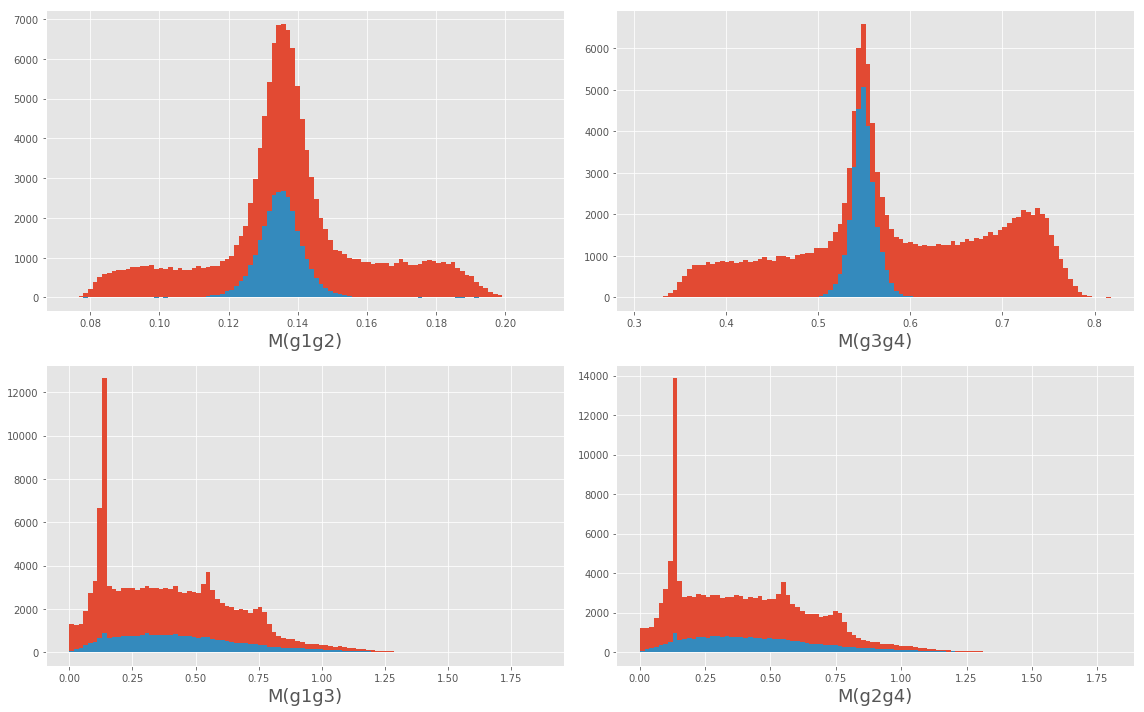

In [73]:
fig,ax=plt.subplots(2,2,figsize=(16,10))
ax=ax.flatten()
ax[0].set_xlabel("M(g1g2)",size=18)
ax[1].set_xlabel("M(g3g4)",size=18)
ax[2].set_xlabel("M(g1g3)",size=18)
ax[3].set_xlabel("M(g2g4)",size=18)
df=data
calculateMass(df,1,2).hist(bins=100,ax=ax[0],weights=df.AccWeight)
calculateMass(df,3,4).hist(bins=100,ax=ax[1],weights=df.AccWeight)
calculateMass(df,1,3).hist(bins=100,ax=ax[2],weights=df.AccWeight)
calculateMass(df,2,4).hist(bins=100,ax=ax[3],weights=df.AccWeight)
calculateMass(df,1,2).hist(bins=100,ax=ax[0],weights=df.AccWeight*df.qvalue)
calculateMass(df,3,4).hist(bins=100,ax=ax[1],weights=df.AccWeight*df.qvalue)
calculateMass(df,1,3).hist(bins=100,ax=ax[2],weights=df.AccWeight*df.qvalue)
calculateMass(df,2,4).hist(bins=100,ax=ax[3],weights=df.AccWeight*df.qvalue)
plt.tight_layout()

/d/home/ln16/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/d/home/ln16/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


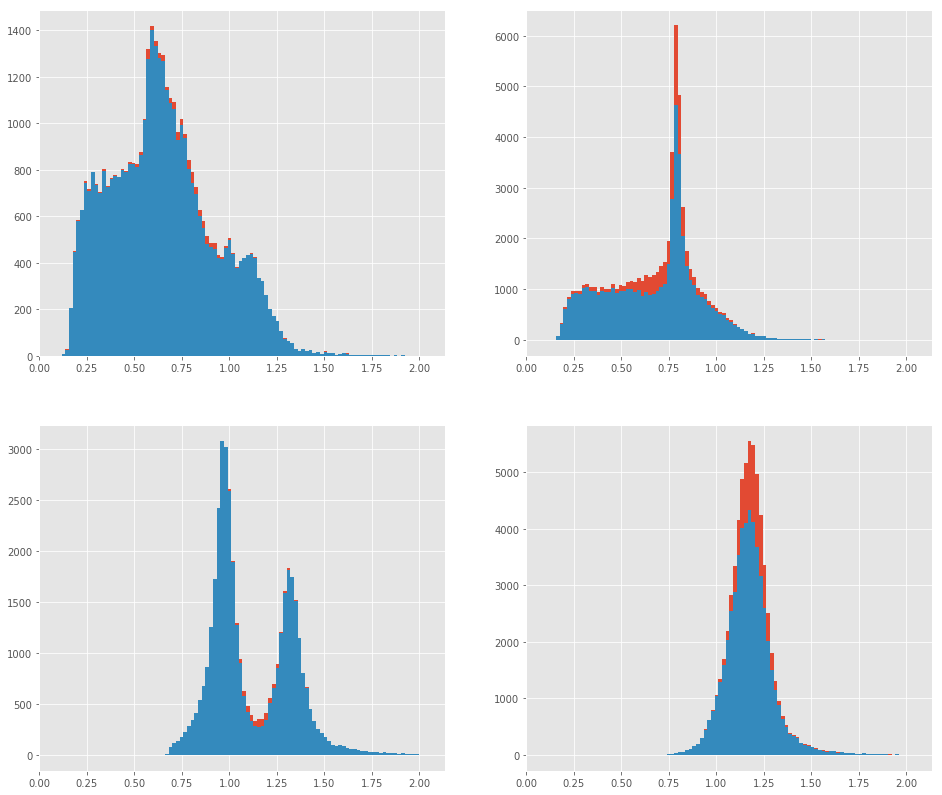

In [12]:
fig,ax=plt.subplots(2,2,figsize=(16,14))
ax=ax.flatten()

binedges1=np.histogram(data.Mpi0eta,bins=100)[1]
binedges2=np.histogram(data.Mpi0g1,bins=100)[1]

df1=data[(data.mcprocess==0)|(data.mcprocess==1)]
df2=data[data.mcprocess==2]
_=ax[0].hist(df1.Mpi0g1,weights=df1.AccWeight,bins=binedges2)
_=ax[1].hist(df2.Mpi0g1,weights=df2.AccWeight,bins=binedges2)
_=ax[2].hist(df1.Mpi0eta,weights=df1.AccWeight,bins=binedges2)
_=ax[3].hist(df2.Mpi0eta,weights=df2.AccWeight,bins=binedges2)
df1=df1[data.nn1<0.9]
df2=df2[data.nn1<0.9]
_=ax[0].hist(df1.Mpi0g1,weights=df1.AccWeight,bins=binedges2)
_=ax[1].hist(df2.Mpi0g1,weights=df2.AccWeight,bins=binedges2)
_=ax[2].hist(df1.Mpi0eta,weights=df1.AccWeight,bins=binedges2)
_=ax[3].hist(df2.Mpi0eta,weights=df2.AccWeight,bins=binedges2)

## Quickly check what Mpi0g vs Mpi0 looks like

AttributeError: 'DataFrame' object has no attribute 'Mpi0g1s'

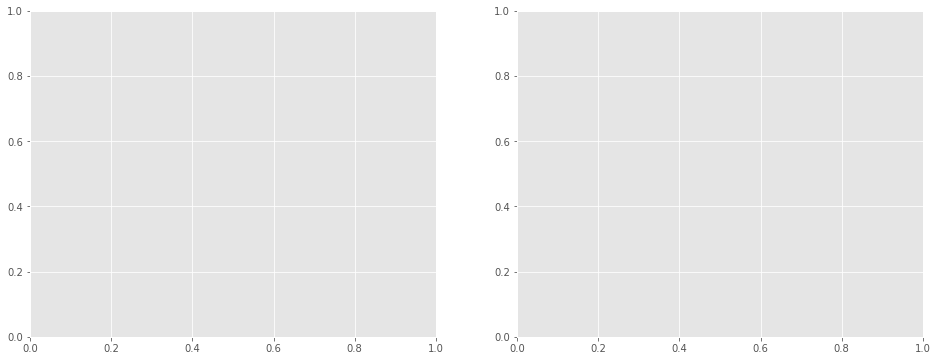

In [4]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
df=data[(data.Mpi0g1s<1.3)&(data.mcprocess==2)]
ax[0].hist2d(df.Mpi0,df.Mpi0g1s,bins=(100,100))#,norm=mpl.colors.LogNorm())
ax[0].grid(False)
ax[0].set_xlabel("Mpi0",size=20)
ax[0].set_ylabel("Mpi0g",size=20)
ax[0].set_title("b1 MC",size=20)
df=data[(data.Mpi0g1s<1.3)&(data.mcprocess.isin([0,1]))]
ax[1].hist2d(df.Mpi0,df.Mpi0g1s,bins=(100,100))#,norm=mpl.colors.LogNorm())
ax[1].grid(False)
ax[1].set_xlabel("Mpi0",size=20)
ax[1].set_ylabel("Mpi0g",size=20)
ax[1].set_title("a0/a2 MC",size=20)

## Measuring how much omegas are removed

In [ ]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)
def linear(x,m,b):
    return m*x+b
def fitFunc(x, mean, amplitude, standard_deviation, m, b):
    return gaussian(x,mean,amplitude,standard_deviation)+linear(x,m,b)

from scipy.optimize import curve_fit
import scipy 
nBins=200
fig,axes= plt.subplots(2,1,figsize=(16,12))

######################
# Get plots for the dataset with q-values applied
######################
counts,edges=np.histogram(data.Mpi0g1s,bins=nBins,weights=data.AccWeight*data.qvalues)
centers=edges[1:]-(edges[1:]-edges[:-1])/2
binWidth=edges[1]-edges[0]
fitLocs = (centers>0.7)*(centers<0.9)
xLocs = centers[fitLocs]
yLocs = counts[fitLocs]

popt, _ = curve_fit(fitFunc, xLocs, yLocs, p0=[0.8, 1000, 0.05, 5000, 1000])

dHist_Mpi0g1=axes[0].hist(data.Mpi0g1s,bins=nBins,weights=data.AccWeight*data.qvalues,
                      edgecolor='steelblue',facecolor='steelblue')
axes[0].plot(xLocs, fitFunc(xLocs, *popt), label='fit', c='red')
axes[0].plot(xLocs, linear(xLocs,*popt[3:]), label='bkg', c='orange')
axes[0].plot(xLocs, gaussian(xLocs,*popt[:-2]), label='bkg', c='purple')

yheight=170
axes[0].axhline(yheight,linestyle="--")
axes[0].axvline(xLocs[-1],linestyle="--")
axes[0].axvline(xLocs[0],linestyle="--")
areaRect=yheight*(xLocs[-1]-xLocs[0])
intGaus=scipy.integrate.simps(gaussian(xLocs,*popt[:-2]),xLocs)
intGaus/=binWidth
axes[0].set_title("Integral of Gaus: {0}".format(intGaus),size=18)


######################
# Get plots for the dataset without q-values applied
######################
counts,edges=np.histogram(data.Mpi0g1s,bins=nBins,weights=data.AccWeight)
centers=edges[1:]-(edges[1:]-edges[:-1])/2
fitLocs = (centers>0.7)*(centers<0.9)
xLocs = centers[fitLocs]
yLocs = counts[fitLocs]

popt, _ = curve_fit(fitFunc, xLocs, yLocs, p0=[0.8, 1000, 0.05, 5000, 1000])

dHist_Mpi0g1=axes[1].hist(data.Mpi0g1s,bins=nBins,weights=data.AccWeight,
                      edgecolor='steelblue',facecolor='steelblue')
axes[1].plot(xLocs, fitFunc(xLocs, *popt), label='fit', c='red')
axes[1].plot(xLocs, linear(xLocs,*popt[3:]), label='bkg', c='orange')
axes[1].plot(xLocs, gaussian(xLocs,*popt[:-2]), label='bkg', c='purple')

yheight=2400
axes[1].axhline(yheight,linestyle="--")
axes[1].axvline(xLocs[-1],linestyle="--")
axes[1].axvline(xLocs[0],linestyle="--")
areaRect=yheight*(xLocs[-1]-xLocs[0])
intGaus=scipy.integrate.simps(gaussian(xLocs,*popt[:-2]),xLocs)
intGaus/=binWidth
axes[1].set_title("Integral of Gaus: {0}".format(intGaus),size=18)

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(14,12))
sns.set()

def colorAlpha(color,alpha):
    color=colors.to_rgba(color)
    color=list(color)
    color[3]=alpha
    return color

varsToPlot=["Mpi0g1s","Mpi0etas"]

for i, varToPlot in enumerate(varsToPlot):
    binedges=np.histogram(data[varToPlot],bins=150)[1]
    dataSig=data[(data.mcprocess==0)|(data.mcprocess==1)]
    _ = axes[i].hist(dataSig[varToPlot],bins=binedges,weights=dataSig.AccWeight*dataSig.weightBS,
                          edgecolor=colorAlpha('orange',0),facecolor=colorAlpha('orange',0.4),label="Signal AS*BS")

    _ = axes[i].hist(data[varToPlot],bins=binedges,weights=data.AccWeight*data.qvalues,
                          edgecolor=colorAlpha('steelblue',0),facecolor=colorAlpha('steelblue',0.4),label="AS*Q")

    _ = axes[i].hist(data[varToPlot],bins=binedges,weights=data.AccWeight*data.weightBS,
                          edgecolor=colorAlpha('gray',0),facecolor=colorAlpha('gray',0.4),label="AS*BS")
    axes[i].legend(prop={"size":20})
    axes[i].set_xlabel(varToPlot,size=14)



## What does this mean for the a0 and a2

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(16,8))
axes=axes.flatten()

counts, xedges, yedges = np.histogram2d(x=data.Mpi0etas,y=data.cosTheta_eta_gj,bins=(50,20))
def plotGJ(df,ax,lab,xedges,yedges,includeQ):
    if includeQ:
        h=ax.hist2d(x=df.Mpi0etas,y=df.cosTheta_eta_gj,weights=df.AccWeight*df.qvalues,bins=(xedges,yedges))
    else:
        h=ax.hist2d(x=df.Mpi0etas,y=df.cosTheta_eta_gj,weights=df.AccWeight,bins=(xedges,yedges))
    ax.grid(False)
    ax.set_title(lab)
    ax.set_ylabel("CosTheta_GJ eta")
    ax.set_xlabel("Mpi0eta")
    plt.colorbar(h[3],ax=ax)
plotGJ(data[data.mcprocess==0],axes[0],"a0",xedges,yedges,True)
plotGJ(data[data.mcprocess==1],axes[1],"a2",xedges,yedges,True)
plotGJ(data[data.mcprocess==2],axes[2],"b1",xedges,yedges,True)
plt.tight_layout()

## Was going to check distribution of Q-values/Meta/Mpi0 by doing a sideband subtraction of Mpi0g1 but I dont think I learn anything

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(16,10))
axes=axes.flatten()
_,binedges=np.histogram(data.Mpi0g1s,bins=300)
dHist_Mpi0g1=axes[0].hist(data.Mpi0g1s,bins=binedges,weights=data.AccWeight*data.qvalues,
                      edgecolor='steelblue',facecolor='steelblue')

center=0.78
sbLL=0.67
sbLM=0.71
sbLR=0.72
sbRL=0.84
sbRM=0.85
sbRR=0.89
sbC=(data.Mpi0g1s>sbLR)*(data.Mpi0g1s<sbRL)
sbR=(data.Mpi0g1s<sbRR)*(data.Mpi0g1s>sbRM)
sbL=(data.Mpi0g1s<sbLM)*(data.Mpi0g1s>sbLL)


dHist_Mpi0g1=axes[0].hist(data[sbC].Mpi0g1s,bins=binedges,weights=data[sbC].AccWeight*data[sbC].qvalues,
                      edgecolor='indianred',facecolor='indianred')
dHist_Mpi0g1=axes[0].hist(data[sbR].Mpi0g1s,bins=binedges,weights=data[sbR].AccWeight*data[sbR].qvalues,
                      edgecolor='green',facecolor='green')
dHist_Mpi0g1=axes[0].hist(data[sbL].Mpi0g1s,bins=binedges,weights=data[sbL].AccWeight*data[sbL].qvalues,
                      edgecolor='green',facecolor='green')
axes[0].set_xlabel("Mpi0g1",size=20)



sbWeight=((sbRL-center)+(center-sbLR))/((sbRR-sbRM)+(sbLM-sbLL))
print("sbWeight: {0}".format(sbWeight))

# axes[0].axvline(center,c='black',linestyle='--')
# axes[0].axvline(sbLL,c='black',linestyle='--')
# axes[0].axvline(sbLM,c='black',linestyle='--')
# axes[0].axvline(sbLR,c='black',linestyle='--')
# axes[0].axvline(sbRL,c='black',linestyle='--')
# axes[0].axvline(sbRM,c='black',linestyle='--')
# axes[0].axvline(sbRR,c='black',linestyle='--')

# ----------------------------------------
df=data[sbC | sbR | sbL]
df['omegaSB']=0
df.omegaSB.loc[sbR]=-sbWeight
df.omegaSB.loc[sbL]=-sbWeight
df.omegaSB.loc[sbC]=1

counts,binedges=np.histogram(data[sbC].qvalues,bins=150)
data[sbC].qvalues.hist(bins=binedges,weights=data[sbC].AccWeight*data[sbC].qvalues,
                       ax=axes[1],density=True,label="sbC",alpha=0.5)
data[sbL|sbR].qvalues.hist(bins=binedges,weights=data[sbL|sbR].AccWeight*data[sbL|sbR].qvalues,
                           ax=axes[1],density=True,label="sbL|sbR",alpha=0.5)
axes[1].legend(prop={'size':20})
axes[1].set_xlabel("(KDE)Q-Value",size=20)

plt.tight_layout()

## Looking at GJ vs Mpi0eta in Data

In [ ]:
dataFile_data=ROOT.TFile.Open("results_data_pi0Bkg_16/diagnosticPlots/postQVal_flatTree.root")
dataTree_data=dataFile_data.degALL_data_2017_mEllipse_tree_flat

if nentries==-1:
    nentries=dataTree_data.GetEntries()

qvalues_data=np.zeros(nentries)
NLLBests_data=np.zeros(nentries)
NLLWorsts_data=np.zeros(nentries)
worst_qvalues_data=np.zeros(nentries)
eff_nentrieses_data=np.zeros(nentries)
Mpi0g1s_data=np.zeros(nentries)
Mpi0etas_data=np.zeros(nentries)
AccWeights_data=np.zeros(nentries)
mcprocesses_data=np.zeros(nentries)
weightBSs_data=np.zeros(nentries)
cosTheta_eta_gjs_data=np.zeros(nentries)
for ientry in range(nentries):
    dataTree_data.GetEntry(ientry)
    qvalues_data[ientry]=dataTree_data.qvalue
#     NLLBests[ientry]=dataTree_data.qvalue_NLLBest
#     NLLWorsts[ientry]=dataTree_data.qvalue_NLLWorst
#     worst_qvalues[ientry]=dataTree_data.worst_qvalue
#     eff_nentrieses[ientry]=dataTree_data.eff_nentries
#     mcprocesses[ientry]=dataTree_data.mcprocess
    Mpi0g1s_data[ientry]=dataTree_data.Mpi0g1
    Mpi0etas_data[ientry]=dataTree_data.Mpi0eta
    AccWeights_data[ientry]=dataTree_data.AccWeight
    weightBSs_data[ientry]=dataTree_data.weightBS
    cosTheta_eta_gjs_data[ientry]=dataTree_data.cosTheta_eta_gj
    
data_data=pd.DataFrame([qvalues_data,NLLBests_data,NLLWorsts_data,worst_qvalues_data,eff_nentrieses_data,
                   Mpi0g1s_data,Mpi0etas_data,AccWeights_data,mcprocesses_data,
                   weightBSs_data,cosTheta_eta_gjs_data]).T
data_data.columns=["qvalues","NLLBests","NLLWorsts","worst_qvalues","eff_nentrieses","Mpi0g1s","Mpi0etas",
             "AccWeight","mcprocess","weightBS","cosTheta_eta_gj"]
data_data["deltaNLL"]=data_data.NLLBests-data_data.NLLWorsts
data_data["deltaQ"]=data_data.qvalues-data_data.worst_qvalues

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(16,8))
axes=axes.flatten()
counts, xedges, yedges = np.histogram2d(x=data_data.Mpi0etas,y=data_data.cosTheta_eta_gj,bins=(75,50))
plotGJ(data_data,axes[0],"Spring 2017 Data -- Accidentals Only",xedges,yedges,False)
plotGJ(data_data,axes[1],"Spring 2017 Data -- Accidental + Q-Factor",xedges,yedges,True)
axes[0].axvline(0.782,c='r',linestyle="--",alpha=0.6)
axes[0].axvline(0.980,c='r',linestyle="--",alpha=0.6)
axes[0].axvline(1.320,c='r',linestyle="--",alpha=0.6)
axes[1].axvline(0.782,c='r',linestyle="--",alpha=0.6)
axes[1].axvline(0.980,c='r',linestyle="--",alpha=0.6)
axes[1].axvline(1.320,c='r',linestyle="--",alpha=0.6)
plt.tight_layout()

## Distribution of Effective # of neighbors

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(data.eff_nentrieses,bins=50,label="Effective # nentries")
nentries_mean=data.eff_nentrieses.mean()
ax.axvline(data.eff_nentrieses.mean(),c='r',label="mean:"+str(int(nentries_mean)))
ax.legend(prop={"size":12})